### Linear model (logistic regression for classification)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell  #to run all statements in cell, not only the last
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.linear_model import Ridge
from typing import Dict, Tuple
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

import graphviz 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [2]:
data = pd.read_csv('heart.csv', sep=",")
data.head(5)
data.dtypes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [3]:
features = data.drop(['target'], axis=1)
target_tmp = data['target']

target = pd.DataFrame({'target':target_tmp.index, 'target':target_tmp.values})

features.head(5)
type(features)
features.shape
target.head(5)
type(target)
target.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


pandas.core.frame.DataFrame

(303, 13)

,target
0,1
1,1
2,1
3,1
4,1


pandas.core.frame.DataFrame

(303, 1)

In [4]:
UCI_X_train, UCI_X_test, UCI_y_train, UCI_y_test = train_test_split(features, target, test_size=0.1, random_state=1)
UCI_X_train.shape
UCI_X_test.shape
UCI_y_train.shape
UCI_y_test.shape

type(UCI_X_train)

(272, 13)

(31, 13)

(272, 1)

(31, 1)

pandas.core.frame.DataFrame

In [5]:
from sklearn.linear_model import LogisticRegression
cl1 = LogisticRegression().fit(UCI_X_train, UCI_y_train)

In [6]:
pred_iris_y_test = cl1.predict(UCI_X_test)
pred_iris_y_test
UCI_y_test['target'].values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [7]:
accuracy_score(UCI_y_test, pred_iris_y_test)
precision_score(UCI_y_test, pred_iris_y_test), recall_score(UCI_y_test, pred_iris_y_test)
f1_score(UCI_y_test, pred_iris_y_test)

0.8709677419354839

(0.8235294117647058, 0.9333333333333333)

0.8749999999999999

In [8]:
scores_loo = cross_val_score(LogisticRegression(), 
                         features, target, 
                         cv=LeaveOneOut())
np.mean(scores_loo)

0.8283828382838284

### SVM model for classification

In [9]:
x_np = UCI_X_train[['thalach','ca']].values
y_np = UCI_y_train['target'].values

iris_X = x_np
iris_y = y_np

In [10]:
iris_X.shape
iris_y.shape

type(iris_X)
type(iris_y)

iris_X
iris_y

(272, 2)

(272,)

numpy.ndarray

numpy.ndarray

array([[171,   0],
       [152,   0],
       [159,   1],
       [126,   0],
       [186,   0],
       [138,   0],
       [163,   2],
       [158,   0],
       [111,   0],
       [179,   2],
       [115,   1],
       [126,   0],
       [133,   2],
       [136,   0],
       [169,   0],
       [130,   1],
       [163,   0],
       [181,   0],
       [133,   0],
       [184,   0],
       [163,   1],
       [132,   0],
       [122,   0],
       [172,   0],
       [158,   0],
       [150,   0],
       [143,   1],
       [182,   0],
       [112,   1],
       [154,   0],
       [190,   0],
       [172,   1],
       [173,   1],
       [164,   1],
       [162,   0],
       [160,   0],
       [160,   2],
       [122,   2],
       [132,   1],
       [151,   0],
       [162,   0],
       [109,   3],
       [152,   0],
       [120,   2],
       [114,   0],
       [142,   1],
       [113,   1],
       [147,   1],
       [148,   0],
       [175,   2],
       [162,   0],
       [ 88,   1],
       [148,

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [11]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(iris_X, iris_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = iris_X[:, 0], iris_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('thalach')
    ax.set_ylabel('ca')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

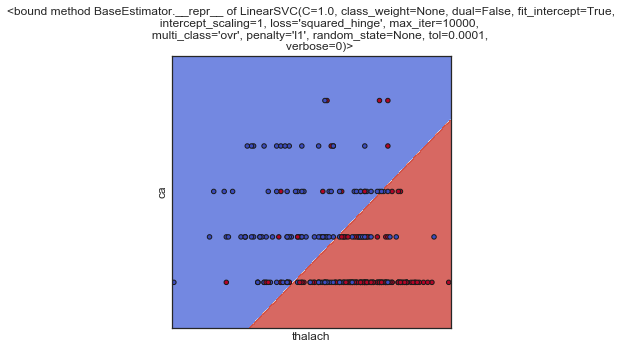

In [12]:
plot_cl(LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000))

In [13]:
clf = LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000).fit(UCI_X_train, UCI_y_train)

pred_iris_y_test = clf.predict(UCI_X_test)

In [14]:
pred_iris_y_test
UCI_y_test['target'].values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [15]:
accuracy_score(UCI_y_test, pred_iris_y_test)
precision_score(UCI_y_test, pred_iris_y_test), recall_score(UCI_y_test, pred_iris_y_test)
f1_score(UCI_y_test, pred_iris_y_test)

0.9032258064516129

(0.8333333333333334, 1.0)

0.9090909090909091

In [16]:
scores_loo = cross_val_score(LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000).fit(UCI_X_train, UCI_y_train), 
                         features, target, 
                         cv=LeaveOneOut())
np.mean(scores_loo)

0.834983498349835

#### Some grid search for svm

In [17]:
n_range = np.array(range(100,10000,100))
tuned_parameters = [{'max_iter': n_range}]
tuned_parameters

[{'max_iter': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
         1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
         2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300,
         3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400,
         4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500,
         5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600,
         6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700,
         7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800,
         8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900])}]

In [18]:
clf_gs = GridSearchCV(LinearSVC(), tuned_parameters, cv=8, scoring='f1', verbose=1, n_jobs=-1)
clf_gs.fit(UCI_X_train, UCI_y_train)

Fitting 8 folds for each of 99 candidates, totalling 792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 419 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 792 out of 792 | elapsed:  1.2min finished
C:\Users\bulat\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=8, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_iter': array([ 100,  200, ..., 9800, 9900])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [19]:
clf_gs.cv_results_

{'mean_fit_time': array([0.03048879, 0.03099349, 0.03399196, 0.03498998, 0.03748894,
        0.04149187, 0.05548489, 0.04998592, 0.04348737, 0.05048874,
        0.05798617, 0.05798426, 0.05598283, 0.0569835 , 0.06548306,
        0.0654828 , 0.06748238, 0.0869737 , 0.09047571, 0.09647381,
        0.085978  , 0.08897921, 0.09597588, 0.09547564, 0.15895575,
        0.20144984, 0.20595095, 0.19544956, 0.17545626, 0.16595751,
        0.18645233, 0.2014493 , 0.18945083, 0.21894491, 0.23543939,
        0.25942886, 0.41989592, 0.30192327, 0.29342842, 0.3309159 ,
        0.31941977, 0.43389055, 0.53586385, 0.58088949, 0.5354369 ,
        0.43196455, 0.40524542, 0.30203703, 0.22509158, 0.32891724,
        0.28416833, 0.32211989, 0.37477574, 0.47737914, 0.36990425,
        0.45638359, 0.39689863, 0.36340839, 0.39590308, 0.38190427,
        0.4578827 , 0.39089876, 0.40539914, 0.36390698, 0.35690749,
        0.4024013 , 0.38140318, 0.4148958 , 0.41189447, 0.36990616,
        0.37340537, 0.38590276,

In [20]:
clf_gs.best_estimator_
clf_gs.best_score_
clf_gs.best_params_

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=3300,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

0.8476639415373579

{'max_iter': 3300}

### Decision tree model for classification

In [21]:
clf = DecisionTreeClassifier(random_state=1).fit(UCI_X_train, UCI_y_train)
pred_iris_y_test = clf.predict(UCI_X_test)

In [22]:
pred_iris_y_test
UCI_y_test['target'].values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [23]:
accuracy_score(UCI_y_test, pred_iris_y_test)
precision_score(UCI_y_test, pred_iris_y_test), recall_score(UCI_y_test, pred_iris_y_test)
f1_score(UCI_y_test, pred_iris_y_test)

0.7741935483870968

(0.7222222222222222, 0.8666666666666667)

0.7878787878787877

In [24]:
scores_loo = cross_val_score(DecisionTreeClassifier(random_state=1), 
                         features, target, 
                         cv=LeaveOneOut())
np.mean(scores_loo)

0.7953795379537953

### Result by F1

KNN: 0.6842105263157895  
Decision tree: 0.7878787878787877  
LogReg: 0.8749999999999999  
SVM: 0.9090909090909091  
    
BEST SVM